# **PARKINSON'S DISEASE DETECTION USING MACHINE LEARNING**

### Parkinson Disease

Parkinson Disease is a brain neurological disorder. It leads to shaking of the body, hands and provides stiffness to the body. No proper cure or treatment is available yet at the advanced stage. Treatment is possible only when done at the early or onset of the disease. These will not only reduce the cost of the disease but will also possibly save a life. Most methods available can detect Parkinson in an advanced stage; which means loss of approx.. 60% dopamine in basal ganglia and is responsible for controlling the movement of the body with a small amount of dopamine. More than 145,000 people have been found alone suffering in the U.K and in India, almost one million population suffers from this disease and it’s spreading fast in the entire world.

A person diagnosed with Parkinson’s disease can have other symptoms that include:

* Depression

* Anxiety

* Sleeping, and memory-related issues

* Loss of sense of smell along with balance problems.

What causes Parkinson’s disease is still unclear, but researchers have research that several factors are responsible for triggering the disease. It includes:

* Genes- Certain mutation genes have been found by research that are very rare. The gene variants often increase the risk of Parkinson’s disease but have a lesser effect on each genetic marker.

* Environment- Due to certain harmful toxins or chemical substances found in the environment can trigger the disease but have a lesser effect

Although it develops at age of 65 15% can be found at young age people less than 50. We will make use of XGBoost, KNN, SVMs, and Random Forest Algorithm to check which is the best algorithm for detection of the onset of disease.

### **Objective of the Project**

The main objective of this project is to understand what Parkinson’s disease is and to detect the early onset of the disease. I will be using the XGBoost, KNN Algorithm, Support Vector Machines (SVMs), Random Forest Algorithm and utilize the data-set available on UCL Parkinson Data-set.

### **About the Dataset**

#### **Data**

The data & attributes information for this project is available at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

#### **Attribute Information:**

Matrix column entries (attributes):
1. **name** - ASCII subject name and recording number
2. **MDVP:Fo(Hz)** - Average vocal fundamental frequency
3. **MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency
4. **MDVP:Flo(Hz)** - Minimum vocal fundamental frequency
5. **MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP** - Several measures of variation in fundamental frequency
6. **MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA** - Several measures of variation in amplitude
7. **NHR,HNR** - Two measures of ratio of noise to tonal components in the voice
8. **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy
9. **RPDE,D2** - Two nonlinear dynamical complexity measures
10. **DFA** - Signal fractal scaling exponent
11. **spread1,spread2,PPE** - Three nonlinear measures of fundamental frequency variation

### **Importing the Dependencies & Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import  RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
# loading the dataset from csv file into a Pandas Dataframe
parkinsons_data = pd.read_csv(r'C:\Users\WCLENG-9\Desktop\Educational Resources\Everything Data Science\Datasets\Parkinsson disease.csv')
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## **Exploratory Data Analysis (EDA)**

In [3]:
# size of the dataset
parkinsons_data.shape

(195, 24)

We have a dataset with 195 rows which indicates a smaller set of data, now let’s see the type of each feature that our dataset holds.

In [4]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

*   Out of 24 features, we have 22 float data types, 1 object & int64 type.
*   Fortunately, this dataset doesn’t hold any missing values.

let’s see how statistically the dataset is spread.

In [5]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
# distribution of the the target variable (status)
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

So now I know that :
* 1 --> Parkinson's Positive (147 people)
* 0 --> Healthy (48 people)

In [7]:
# grouping the data based on the target variable (status)
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


## **Data Pre-Processing**

Seperating the features & target columns

In [8]:
X = parkinsons_data.drop(columns = ['name', 'status'], axis = 1)
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [9]:
y = parkinsons_data['status']
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


## **Building the Model**

Splitting the dataset

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
X_train.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
123,182.018,197.173,79.187,0.00842,0.00005,0.00506,0.00449,0.01517,0.02503,0.231,0.01372,0.01580,0.01931,0.04115,0.01813,18.784,0.589956,0.732903,-5.445140,0.142466,2.174306,0.215558
160,114.238,124.393,77.022,0.00581,0.00005,0.00299,0.00316,0.00896,0.04009,0.406,0.01579,0.01994,0.04114,0.04736,0.02073,20.437,0.653139,0.694571,-5.185987,0.259229,2.151121,0.244948
94,157.821,172.975,68.401,0.00358,0.00002,0.00196,0.00196,0.00587,0.03716,0.307,0.02062,0.02321,0.02764,0.06185,0.00850,22.219,0.502380,0.712170,-6.251425,0.188056,2.143851,0.160812
57,117.274,129.916,110.402,0.00752,0.00006,0.00299,0.00469,0.00898,0.02293,0.221,0.01189,0.01459,0.01948,0.03568,0.00681,22.817,0.530529,0.817756,-4.608260,0.290024,2.021591,0.314464
41,184.055,196.537,166.977,0.00258,0.00001,0.00134,0.00147,0.00403,0.01463,0.132,0.00742,0.00901,0.01234,0.02226,0.00257,26.453,0.306443,0.759203,-7.044105,0.063412,2.361532,0.115730


### **Standardizing the Data**

In [84]:
scaler = StandardScaler()


In [85]:
scaler.fit(X_train)

StandardScaler()

In [86]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [87]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


I will be working on the following algorithms

* KNN
* Random Forest Classifier
* XGBoost
* Support Vector Machine (SVM)

### **KNN**

In [89]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)

#KNN model
accuracy_score(y_test,y_pred1)
print(accuracy_score(y_test,y_pred1)*100)

87.17948717948718


In [90]:
# Hyperparameter Optimization

test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

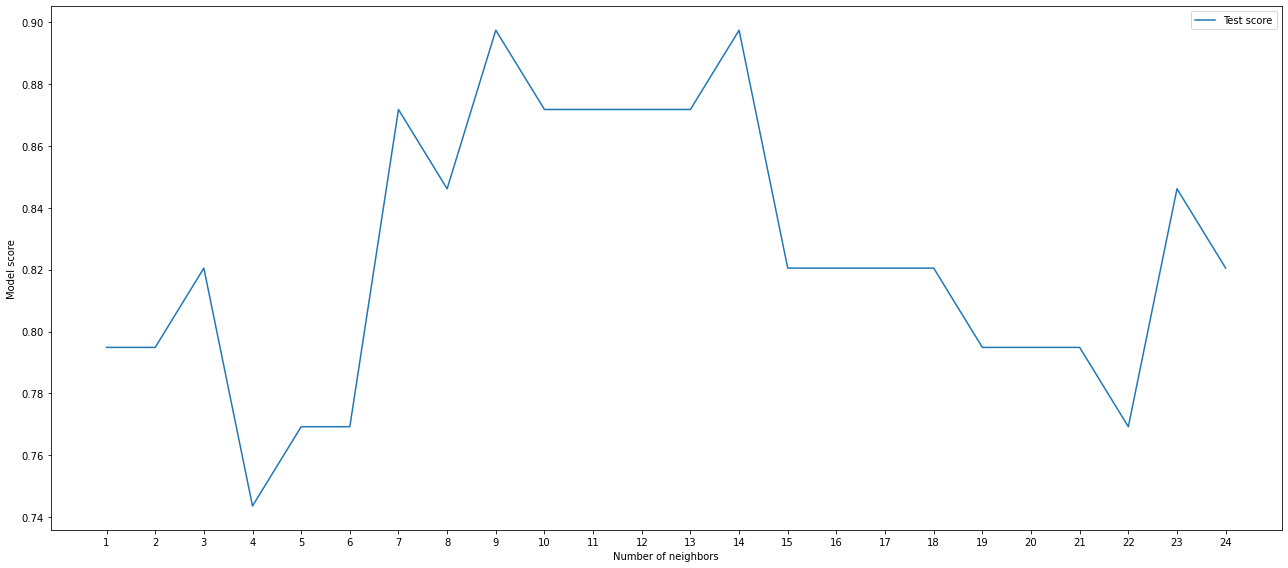

In [91]:
plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 25, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

At K = 14, we are getting highest test accuracy.

In [93]:
knn = KNeighborsClassifier(n_neighbors = 14)
knn.fit(X_train,y_train)
y_pred1 = knn.predict(X_test)

accuracy_score(y_test,y_pred1)
print(accuracy_score(y_test,y_pred1) * 100)

89.74358974358975


The model achieved an accuracy of 89% with KNN Model after Hyperparameter Optimization.

### **Random Forest Classifier**

In [94]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)

In [95]:
print(accuracy_score(y_test,y_pred2)*100)

79.48717948717949


The model achieved an accuracy of 79% with the Random Forest Classifier Model.

### **XGBoost**

In [96]:
xgb = XGBClassifier(eval_metric = 'mlogloss', random_state = 6)
xgb.fit(X_train,y_train)
y_pred3 = xgb.predict(X_test)

In [97]:
print(accuracy_score(y_test,y_pred3)*100)

82.05128205128204


The model achieved an accuracy of 82% with the XGBoost Classifier Model.

## **SVM**

In [98]:
#fitting the model in SVM
model = SVC(kernel = 'linear')
model.fit(X_train,y_train)

SVC(kernel='linear')

In [99]:
y_pred4 = model.predict(X_test)

In [100]:
print(accuracy_score(y_test,y_pred4)*100)

87.17948717948718


The model achieved an accuracy of 87% with the SVM Model.

## **Putting it all together**

In [102]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = knn.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


C:\Users\WCLENG-9\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **Conclusion**

Parkinson’s disease affects the CNS of the brain and has yet no treatment unless it’s detected early. Late detection leads to no treatment and loss of life. Thus its early detection is significant. For early detection of the disease, I utilized machine learning algorithms such as KNN, XGBoost, Random Forest & SVM. After working on the Parkinson disease dataset I found out that KNN is the best Algorithm to predict the onset of the disease which will enable early treatment and save a life.